# Stock Price Prediction

### Importing Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import pickle
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Data Collection

Symbols of all 50 companies in NSE

In [2]:
symbols = ["RELIANCE.NS", "HDFCBANK.NS","ICICIBANK.NS","INFY.NS","HDFC.NS","TCS.NS","ITC.NS","LT.NS","KOTAKBANK.NS"
          ,"AXISBANK.NS","HINDUNILVR.NS","SBIN.NS","BHARTIARTL.NS","BAJFINANCE.NS","M&M.NS","ASIANPAINT.NS",
           "HCLTECH.NS","MARUTI.NS","SUNPHARMA.NS","TITAN.NS","TATASTEEL.NS","NTPC.NS","ULTRACEMCO.NS",
           "ADANIENT.NS","TATAMOTORS.NS","POWERGRID.NS","BAJAJFINSV.NS","INDUSINDBK.NS","HINDALCO.NS",
           "JSWSTEEL.NS","NESTLEIND.NS","TECHM.NS","GRASIM.NS","WIPRO.NS","HDFCLIFE.NS","ONGC.NS","CIPLA.NS",
           "SBILIFE.NS","DRREDDY.NS","BRITANNIA.NS","COALINDIA.NS","ADANIPORTS.NS","EICHERMOT.NS","APOLLOHOSP.NS",
           "TATACONSUM.NS","BAJAJ-AUTO.NS","DIVISLAB.NS","UPL.NS","HEROMOTOCO.NS","BPCL.NS"
          ]

Downloading the dataset from yahoo finance

In [3]:
#price_data = [yf.Ticker(symbol).history(period="5y") for symbol in symbols]

In [4]:
#companyPrice = {a:b for a,b in zip(symbols,price_data)}
#companyPrice

Save the companyPrice dictionary which contains the dataset as a pickle file

In [5]:
# datadict = open('datasetDict.pkl', 'ab')
# pickle.dump(companyPrice, datadict)
# datadict.close()

Loading the pickle file incase dataset was already downloaded

In [6]:
fl = open('datasetDict.pkl', 'rb')
companyPrice = pickle.load(fl)

In [56]:
companyPrice["SBIN.NS"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-26 00:00:00+05:30,273.175334,273.175334,267.175238,267.760620,15306032,0.0,0.0
2018-02-27 00:00:00+05:30,266.345951,269.175261,259.467798,261.077576,20824909,0.0,0.0
2018-02-28 00:00:00+05:30,257.809206,263.126380,254.443284,261.467804,26810799,0.0,0.0
2018-03-01 00:00:00+05:30,259.809249,263.419078,254.882349,255.760406,22859175,0.0,0.0
2018-03-05 00:00:00+05:30,254.101836,258.540923,252.443260,257.077484,18484565,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-20 00:00:00+05:30,532.000000,533.950012,522.150024,525.150024,12570032,0.0,0.0
2023-02-21 00:00:00+05:30,527.099976,528.950012,522.400024,523.450012,10223218,0.0,0.0
2023-02-22 00:00:00+05:30,520.750000,521.900024,512.500000,516.349976,14763050,0.0,0.0


In [8]:
c,rel = 'Close','RELIANCE.NS' # we will be using closing price for prediction

### Utilities

Train-test split

In [9]:
testing_ratio,training_ratio=0.2,0.8

In [10]:
training_size,testing_size = int(training_ratio*len(companyPrice[rel])),int(testing_ratio*len(companyPrice[rel]))

In [11]:
print(f'Training and testing size for Reliance, {training_size=}, {testing_size=}')

Training and testing size for Reliance, training_size=989, testing_size=247


Root mean square error

In [12]:
def rmse(actual, predicted):
    rmse = np.sqrt(np.mean((actual-predicted)**2))
    return rmse

In [13]:
def calculate_rmse(actual_prices:pd.DataFrame, predicted_prices:np.array):
    tr_size = int(training_ratio*len(actual_prices))
    error = rmse(np.array(actual_prices[tr_size:]['Close']), np.array(predicted_prices[tr_size:]))
    return error

Plotting

In [14]:
def plot_overlapping_graph(actual_price,predicted_price,k,predicted_label) :
    fig = plt.figure(figsize = (20,10))
    plt.plot(actual_price, color = 'red', label ='Actual Stock Price')
    plt.plot(predicted_price, color = 'blue', label = '50 Day '+ predicted_label)
    t = f'{k}'
    plt.title(t)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    

### Simple Moving Average

In [15]:
days = 50

In [16]:
sma = dict()

In [17]:
for k in companyPrice :
    sma[k] = companyPrice[k][c].rolling(days).mean()

In [18]:
sma[rel]

Date
2018-02-26 00:00:00+05:30            NaN
2018-02-27 00:00:00+05:30            NaN
2018-02-28 00:00:00+05:30            NaN
2018-03-01 00:00:00+05:30            NaN
2018-03-05 00:00:00+05:30            NaN
                                ...     
2023-02-20 00:00:00+05:30    2471.556006
2023-02-21 00:00:00+05:30    2467.976006
2023-02-22 00:00:00+05:30    2463.054004
2023-02-23 00:00:00+05:30    2458.094004
2023-02-24 00:00:00+05:30    2454.201001
Name: Close, Length: 1237, dtype: float64

In [19]:
sma_error = {k:calculate_rmse(companyPrice[k],sma[k]) for k in symbols}

In [20]:
sma_error

{'RELIANCE.NS': 126.8782412708126,
 'HDFCBANK.NS': 69.61752679026907,
 'ICICIBANK.NS': 48.33307622363809,
 'INFY.NS': 101.51283599677694,
 'HDFC.NS': 128.18517833958427,
 'TCS.NS': 142.7807602772863,
 'ITC.NS': 19.545569436180514,
 'LT.NS': 116.82665521082257,
 'KOTAKBANK.NS': 72.70895701118404,
 'AXISBANK.NS': 55.07570927371082,
 'HINDUNILVR.NS': 131.7687116472903,
 'SBIN.NS': 31.51939043658903,
 'BHARTIARTL.NS': 37.5005962830097,
 'BAJFINANCE.NS': 585.9732548215098,
 'M&M.NS': 84.01559755876357,
 'ASIANPAINT.NS': 220.77126544398126,
 'HCLTECH.NS': 57.98721504065345,
 'MARUTI.NS': 412.7230430063041,
 'SUNPHARMA.NS': 42.34964573859318,
 'TITAN.NS': 171.37444971857255,
 'TATASTEEL.NS': 12.99682891566203,
 'NTPC.NS': 8.559056054947547,
 'ULTRACEMCO.NS': 473.1181506213879,
 'ADANIENT.NS': 570.232509995902,
 'TATAMOTORS.NS': 28.91930399178356,
 'POWERGRID.NS': 9.775681846275898,
 'BAJAJFINSV.NS': 169.9786276521378,
 'INDUSINDBK.NS': 83.06339565254531,
 'HINDALCO.NS': 57.078848903652684,
 '

Average root mean square error

In [21]:
avg_sma,median_sma = np.mean(np.array(list(sma_error.values()))),np.median(np.array(list(sma_error.values())))

In [22]:
print(f'mean = {avg_sma}, median = {median_sma}')

mean = 141.0703270073666, median = 83.53949660565445


Plotting SMA for Reliance

RMSE for Reliance=126.8782412708126


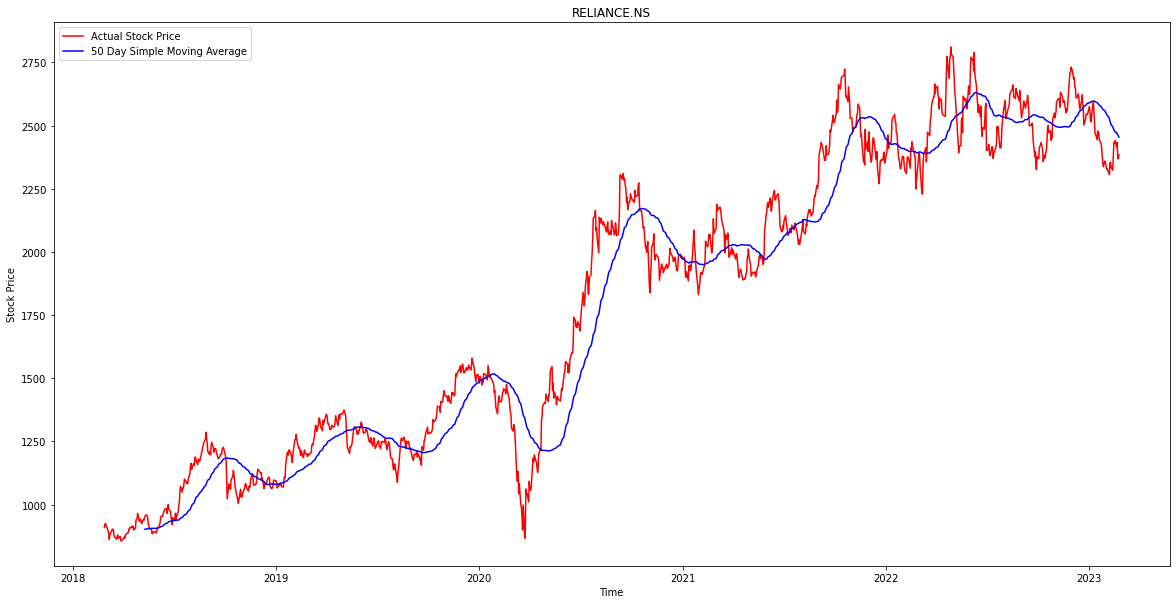

In [23]:
plot_overlapping_graph(companyPrice[rel][c],sma[rel],rel,'Simple Moving Average')
print(f'RMSE for Reliance={sma_error[rel]}')

### Exponential Moving Average

In [24]:
days = 50

In [25]:
ema = dict()

In [26]:
for k in companyPrice :
    ema[k] = companyPrice[k][c].ewm(span=days, adjust=False).mean()

In [27]:
ema[rel]

Date
2018-02-26 00:00:00+05:30     909.982605
2018-02-27 00:00:00+05:30     910.431192
2018-02-28 00:00:00+05:30     911.016151
2018-03-01 00:00:00+05:30     911.344373
2018-03-05 00:00:00+05:30     910.735936
                                ...     
2023-02-20 00:00:00+05:30    2448.150266
2023-02-21 00:00:00+05:30    2447.599279
2023-02-22 00:00:00+05:30    2444.905186
2023-02-23 00:00:00+05:30    2441.869688
2023-02-24 00:00:00+05:30    2439.588522
Name: Close, Length: 1237, dtype: float64

In [28]:
ema_error = {k:calculate_rmse(companyPrice[k],ema[k]) for k in symbols}

In [29]:
ema_error

{'RELIANCE.NS': 105.76298614630346,
 'HDFCBANK.NS': 62.26539163124358,
 'ICICIBANK.NS': 40.71435368257254,
 'INFY.NS': 83.91120920421594,
 'HDFC.NS': 115.10018614549439,
 'TCS.NS': 124.9683151594817,
 'ITC.NS': 17.89896819801238,
 'LT.NS': 100.41243056311374,
 'KOTAKBANK.NS': 61.610121003701686,
 'AXISBANK.NS': 48.483480395901616,
 'HINDUNILVR.NS': 114.11185276765013,
 'SBIN.NS': 27.131977859953352,
 'BHARTIARTL.NS': 31.453631874958248,
 'BAJFINANCE.NS': 479.09272068634147,
 'M&M.NS': 76.31057828731541,
 'ASIANPAINT.NS': 173.8789789883562,
 'HCLTECH.NS': 50.6969634061868,
 'MARUTI.NS': 351.37373400381676,
 'SUNPHARMA.NS': 36.83369384588894,
 'TITAN.NS': 140.74751373253181,
 'TATASTEEL.NS': 11.117706380118479,
 'NTPC.NS': 7.344975304720802,
 'ULTRACEMCO.NS': 388.9247162554582,
 'ADANIENT.NS': 484.5707716273578,
 'TATAMOTORS.NS': 23.60860393332923,
 'POWERGRID.NS': 8.23399589003522,
 'BAJAJFINSV.NS': 137.5486039523357,
 'INDUSINDBK.NS': 69.97676182046118,
 'HINDALCO.NS': 45.7150067457727

Average and median root mean square error

In [30]:
avg_ema,median_ema = np.mean(np.array(list(ema_error.values()))), np.median(np.array(list(ema_error.values())))

In [31]:
print(f'mean = {avg_ema}, median = {median_ema}')

mean = 118.73928164894777, median = 71.79229404260842


Plotting ema for Reliance

RMSE for Reliance=105.76298614630346


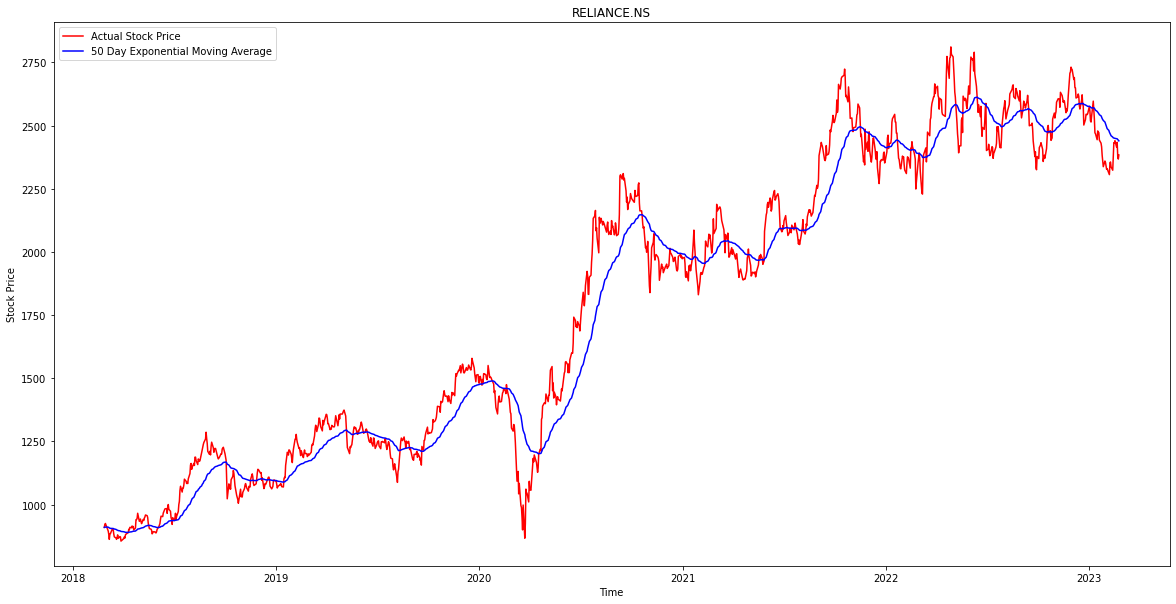

In [32]:
plot_overlapping_graph(companyPrice[rel][c],ema[rel],rel,'Exponential Moving Average')
print(f'RMSE for Reliance={ema_error[rel]}')

#### Comparison between SMA and EMA

In [33]:
print(f'Average RMSE for SMA is {avg_sma} and for EMA is {avg_ema}')

Average RMSE for SMA is 141.0703270073666 and for EMA is 118.73928164894777


In [34]:
print(f'Median RMSE for SMA is {median_sma} and for EMA is {median_ema}')

Median RMSE for SMA is 83.53949660565445 and for EMA is 71.79229404260842


### LSTM

In [35]:
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler

2023-04-12 11:54:39.146070: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 11:54:39.348959: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-12 11:54:39.353288: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-12 11:54:39.353307: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [36]:
days =15

In [37]:
scaler = MinMaxScaler

In [38]:
nifty_close = {k:companyPrice[k][c].values for k in companyPrice}
nifty_close[rel]

array([ 909.98260498,  921.42156982,  925.34765625, ..., 2378.89990234,
       2367.5       , 2383.69995117])

In [39]:
for k in nifty_close :
    nifty_close[k] = nifty_close[k].reshape((-1,1))
#     nifty_close[k] = scaler.fit_transform(nifty_close[k])
nifty_close[rel]

array([[ 909.98260498],
       [ 921.42156982],
       [ 925.34765625],
       ...,
       [2378.89990234],
       [2367.5       ],
       [2383.69995117]])

Splitting closing price into testing and training

In [40]:
nifty_close_train,nifty_close_test = {},{}

for k in nifty_close :
    split = int(training_ratio*len(nifty_close[k]))
    nifty_close_train[k],nifty_close_test[k] = nifty_close[k][:split],nifty_close[k][split:]

In [41]:
len(nifty_close_train[rel]) #len of Reliance's training data

989

In [42]:
nifty_train_generator = {k:TimeseriesGenerator(nifty_close_train[k],nifty_close_train[k],length=days,batch_size=20) for k in nifty_close_train}

In [43]:
nifty_test_generator = {k:TimeseriesGenerator(nifty_close_test[k],nifty_close_test[k],length=days,batch_size=1) for k in nifty_close_test}

In [44]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(days,1)))
model.add(Dropout(.02))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


2023-04-12 11:54:40.950984: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-12 11:54:40.951028: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-12 11:54:40.951056: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shashank-IdeaPad): /proc/driver/nvidia/version does not exist
2023-04-12 11:54:40.951398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [45]:
epoch = 25

In [46]:
model.fit(nifty_train_generator[rel], epochs=epoch, verbose=1)

Epoch 1/25
49/49 [==============================] - 2s 8ms/step - loss: 4118762.7500
Epoch 2/25
49/49 [==============================] - 0s 8ms/step - loss: 1926513.3750
Epoch 3/25
49/49 [==============================] - 0s 8ms/step - loss: 304400.0000
Epoch 4/25
49/49 [==============================] - 0s 8ms/step - loss: 36450.6406
Epoch 5/25
49/49 [==============================] - 0s 6ms/step - loss: 35101.2344
Epoch 6/25
49/49 [==============================] - 0s 7ms/step - loss: 32485.9316
Epoch 7/25
49/49 [==============================] - 0s 6ms/step - loss: 25253.2812
Epoch 8/25
49/49 [==============================] - 0s 6ms/step - loss: 23447.9258
Epoch 9/25
49/49 [==============================] - 0s 6ms/step - loss: 32764.8613
Epoch 10/25
49/49 [==============================] - 0s 8ms/step - loss: 29680.3535
Epoch 11/25
49/49 [==============================] - 0s 6ms/step - loss: 35638.0469
Epoch 12/25
49/49 [==============================] - 0s 8ms/step - loss: 30358.1

In [47]:
prediction = model.predict(nifty_test_generator[rel])

233/233 [==============================] - 1s 2ms/step


In [48]:
prediction

array([[2336.603 ],
       [2302.001 ],
       [2460.833 ],
       [2460.7915],
       [2465.3538],
       [2480.467 ],
       [2522.5032],
       [2545.3958],
       [2586.7642],
       [2610.4392],
       [2621.2754],
       [2659.387 ],
       [2698.0247],
       [2724.205 ],
       [2758.5234],
       [2668.1533],
       [2752.9282],
       [2690.0422],
       [2699.182 ],
       [2691.206 ],
       [2671.4375],
       [2638.6426],
       [2619.8042],
       [2729.9104],
       [2724.5266],
       [2748.656 ],
       [2712.901 ],
       [2576.1953],
       [2793.0737],
       [2816.9377],
       [2854.6128],
       [2920.0818],
       [2820.809 ],
       [2862.8206],
       [2888.467 ],
       [2867.018 ],
       [2917.3826],
       [2745.948 ],
       [2695.9255],
       [2645.6006],
       [2579.5505],
       [2648.9192],
       [2568.1287],
       [2504.103 ],
       [2630.6538],
       [2591.1729],
       [2433.8582],
       [2614.151 ],
       [2638.9956],
       [2560.8994],


Converting prediction values to a dataframe along with dates

In [49]:
prediction = prediction.reshape((-1))

In [50]:
dates = companyPrice[rel].index.to_list()
dates = dates[::-1]
dates = dates[:len(nifty_close_test[rel])-days][::-1]

In [51]:
prediction_df = pd.DataFrame({'Date':dates,'Close':prediction})

In [52]:
prediction_df.set_index('Date',inplace=True)

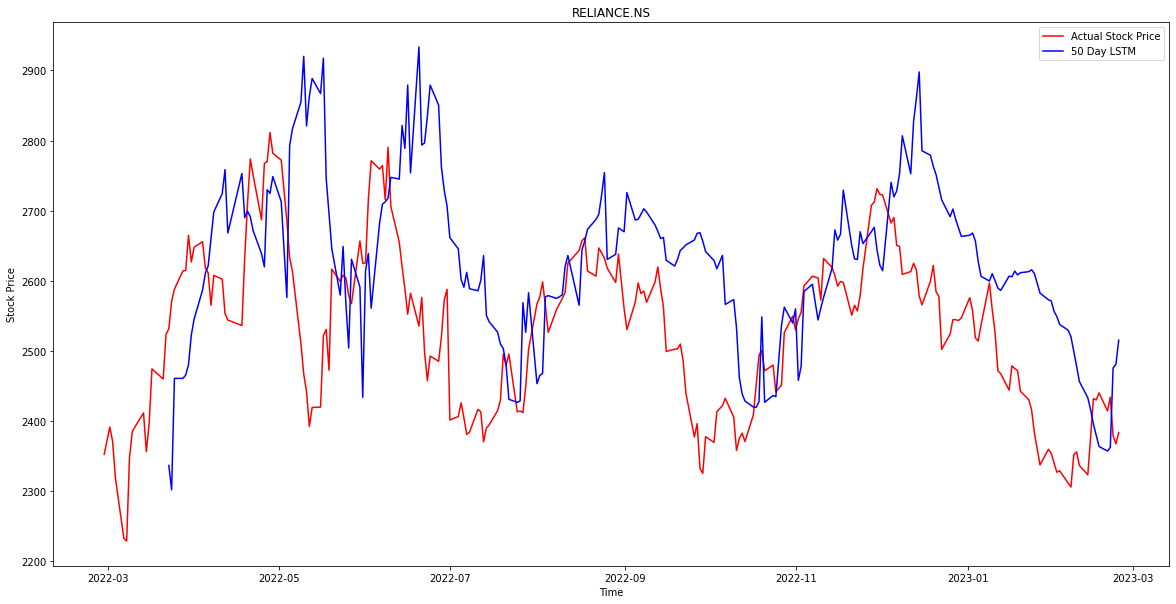

In [53]:
plot_overlapping_graph(companyPrice[rel][c][-len(nifty_close_test[rel]):],prediction_df,rel,'LSTM')

In [54]:
err = rmse(np.array(companyPrice[rel]['Close'][-(len(nifty_close_test[rel])+days):]), np.array(prediction_df))

In [55]:
err

203.1433097839291